In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# 1. Importing and cleaning datasets needed

In [59]:
#importing  Power generation data
pow_gen=pd.read_csv('Plant_1_Generation_Data.csv')
pow_gen.head(100)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
95,15-05-2020 01:00,4135001,bvBOhCH3iADSZry,0.0,0.0,0.0,6316803.0
96,15-05-2020 01:00,4135001,iCRJl6heRkivqQ3,0.0,0.0,0.0,7177992.0
97,15-05-2020 01:00,4135001,ih0vzX44oOqAx2f,0.0,0.0,0.0,6185184.0
98,15-05-2020 01:00,4135001,pkci93gMrogZuBj,0.0,0.0,0.0,7169102.0


In [60]:
#check for missing data
pow_gen.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [61]:
#Converting to datetime dtype and grouping by date to get get the total power yielded in the day(AC power + DC power)
#Note Total Yield given is cumulative power
pow_gen['DATE_TIME']=pd.to_datetime(pow_gen['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [62]:
pow_gen['Date']=pow_gen['DATE_TIME'].dt.date

In [63]:
pow_gen=pow_gen.groupby('Date').sum()

In [64]:
pow_gen['Total Yield/day']=pow_gen['AC_POWER']+pow_gen['DC_POWER']

In [66]:
y1=pow_gen['Total Yield/day']

In [68]:
y1

Date
2020-05-15    6.178070e+06
2020-05-16    6.374497e+06
2020-05-17    7.420570e+06
2020-05-18    5.283518e+06
2020-05-19    5.970205e+06
2020-05-20    5.900670e+06
2020-05-21    7.443811e+06
2020-05-22    7.048515e+06
2020-05-23    8.376101e+06
2020-05-24    7.860172e+06
2020-05-25    8.670541e+06
2020-05-26    7.742189e+06
2020-05-27    6.571235e+06
2020-05-28    8.234515e+06
2020-05-29    8.008241e+06
2020-05-30    7.138356e+06
2020-05-31    5.904492e+06
2020-06-01    5.719826e+06
2020-06-02    7.280478e+06
2020-06-03    7.391100e+06
2020-06-04    8.036807e+06
2020-06-05    7.573048e+06
2020-06-06    6.291271e+06
2020-06-07    7.548584e+06
2020-06-08    8.200203e+06
2020-06-09    7.941246e+06
2020-06-10    6.349977e+06
2020-06-11    5.539853e+06
2020-06-12    5.733644e+06
2020-06-13    8.335809e+06
2020-06-14    6.972004e+06
2020-06-15    6.648020e+06
2020-06-16    6.118008e+06
2020-06-17    5.838163e+06
Name: Total Yield/day, dtype: float64

In [67]:
#import weather data and get mean temperature of sensor in the day
weather=pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [69]:
#check for missing values
weather.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [70]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [80]:
#now converting the the Date_time to datetime dtype from string and grouping the data by date to get mean sensor temperature for the day
weather['DATE_TIME']=pd.to_datetime(weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [81]:
weather['Date']=weather['DATE_TIME'].dt.date

In [82]:
weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Date
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15
...,...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17


In [83]:
weather=weather.groupby('Date').mean()

In [85]:
y2=weather['MODULE_TEMPERATURE']

In [106]:
X=weather.index

In [93]:
#now the data is ready

# 2. Plotting the data 

In [147]:
plt.style.use('seaborn-darkgrid')

<IPython.core.display.Javascript object>


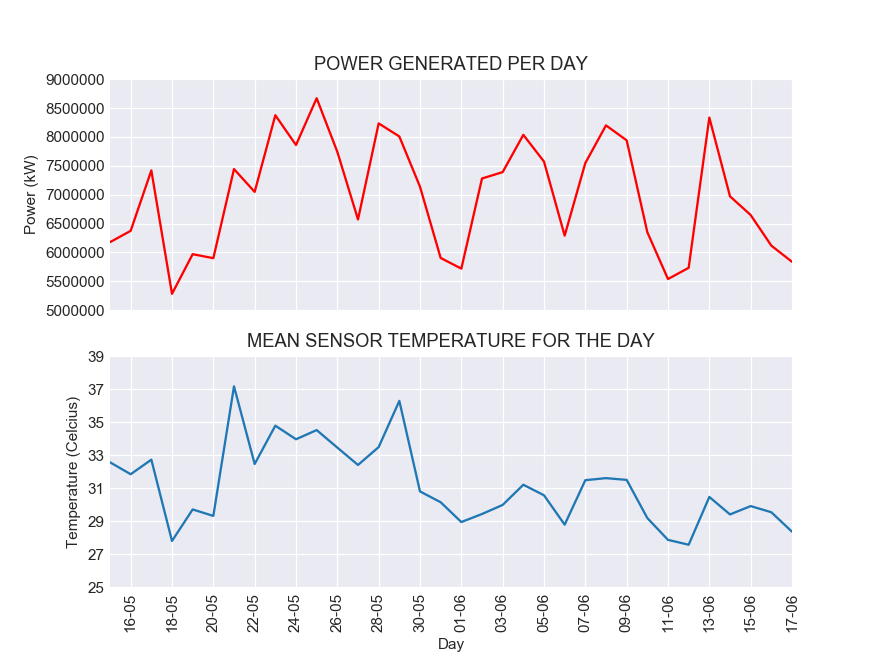

In [162]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))

In [163]:
ax1.plot(y1,color='r')
ax1.set(title='POWER GENERATED PER DAY',ylabel='Power (kW)',ylim=(5000000,9000000),yticks=range(5000000,9000001,500000));

In [164]:
ax2.plot(y2)
ax2.set(title='MEAN SENSOR TEMPERATURE FOR THE DAY',ylabel='Temperature (Celcius)',xlabel='Day',ylim=(25,39),yticks=range(25,40,2));

In [169]:
ax2.set_xticks(X[1::2]);

In [166]:
import matplotlib.dates as mdates
ax2.get_xaxis().set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.xticks(rotation=90);

In [167]:
ax2.set_xlim(pd.Timestamp(2020,5,15),pd.Timestamp(2020,6,17))

(737560.0, 737593.0)

In [170]:
plt.savefig('Plot.png')